# Binning Spike Count Features : Data Visualization 

In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import seaborn as sns
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\Processor")
from data_processor import SpeechDigitsDataset, BinningHistogram
import matplotlib.ticker as ticker
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
data_root = r"root/to/dataset"

train_dataset = SpeechDigitsDataset(data_root, transform = None, mode="train")

In [5]:
item,label = train_dataset[4]

In [16]:
#Initialize binning
binning = BinningHistogram(binning_method="time", T_l=0.005, E=25)

<h2>Plotting the heatmap</h2>
<p>This function plots a heatmap from the features.</p>

In [17]:
def plot_features(features):
    sns.set(rc={'figure.figsize':(15.7,8.27)})

    ax = sns.heatmap(features.T,  cmap="YlGnBu_r")
    ax.set(xlabel="#Frame", ylabel = "Channels")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
    plt.show()

<h1>Time-Binned Spike Count Features</h1>
<p>We will demonstrate time-binning in this section with a heatmap plot.</p>

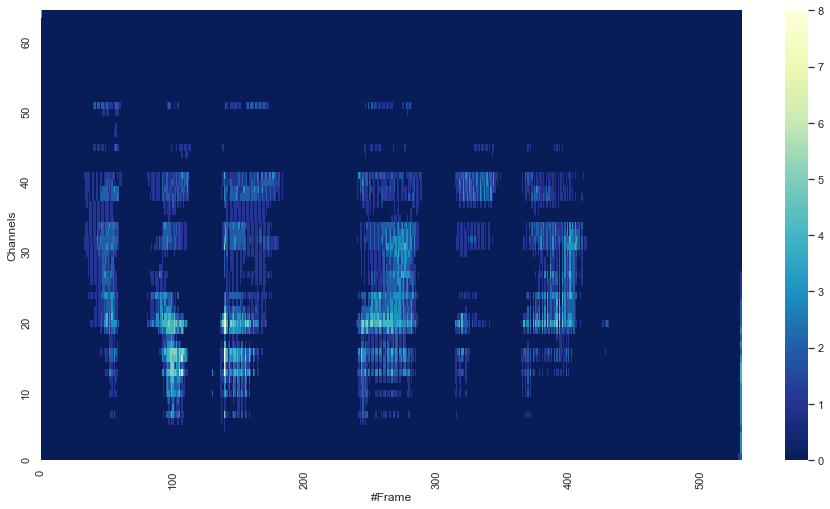

In [19]:
T_l=0.005 #5ms for time-binning
features = binning.time_binning(item=item, T_l=T_l)
plot_features(features)

<h1>Event-Binned Spike Count Features</h1>
<p>We will demonstrate event-binning in this section with a heatmap plot.</p>

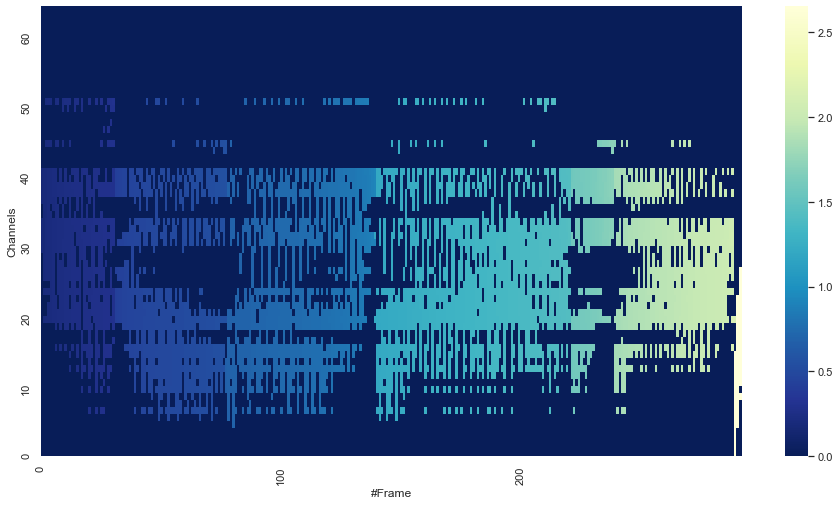

In [22]:
E = 25 #25 for event-binning
features = binning.event_binning(item=item, E = E)
plot_features(features)